#  Тема 2

# Вариант 16

In [3]:
import numpy as np
from numpy import linalg as LA

## Задача 1(7.12)

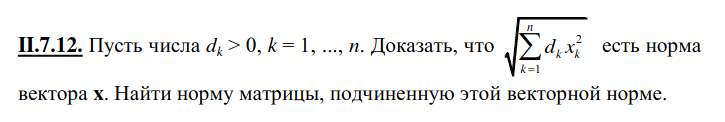

Проверим аксиомы нормы для функции $n(\vec{x}) = \sqrt{\sum\limits_{k = 1}^{n}d_k x_k^2}$, где $d_k > 0 \, \forall i \in \mathbb{Z}\cap [1;n]$:

1) $N(x) > 0 \forall \vec{x} \ne \vec{0}$ и $N(\vec{0}) = 0$ - очевидно, верно

2) Линейность так же верна

3) Неравенство треугольника:
Согласно нераенству Гёльдера, $2\sum\limits_{k = 1}^{n} d_k x_k y_k \leqslant 2 \sqrt{\sum\limits_{k = 1}^{n} d_k x_k^2} \sqrt{\sum\limits_{k = 1}^{n} d_k y_k^2}$. Прибавляя к этому неравенству $\sum\limits_{k = 1}^{n} d_k x_k^2 + \sum\limits_{k = 1}^{n} d_k x_k^2$, имеем $n(x+y)^2 \leqslant (n(x) + n(y))^2$

Найдём матричную норму, подчинённую такой норме: наша норма порождается скалярным произведением с матрицей Грама $\Gamma = diag(d_1, ..., d_n)$. Рассчитаем норму преобразованного вектора:
$n(\vec x) = \sqrt{\langle A\vec x, A\vec x \rangle} = \sqrt{\vec x^TA^T\Gamma A\vec x} = \sqrt{ (D x)^T (D^{-1})^TA^T D^T D AD^{-1} (D\vec x)}  =  \sqrt{ (D x)^T (DA D^{-1})^T D A D^{-1}(D\vec x)} \Rightarrow ||D A D^{-1}||_2 = ||A ||_2    $ так как $\Gamma^* = \Gamma = \sqrt{D}$.

## Задача 2(7.39)

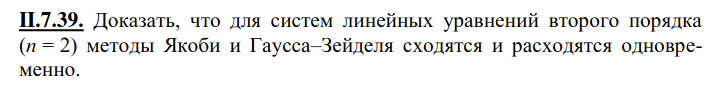

Рассмотрим СЛАУ с матрицей коэффициентов 
\begin{equation*}
    A = \left(
            \begin{array}{cc}
                a & b \\
                c & d \\
            \end{array}
        \right)
\end{equation*}
Критерий сходимости метода Якоби для неё выглядит так: все корни уравнения 
\begin{equation*}
    \begin{vmatrix}
        \lambda a & b\\
        c & \lambda d\\
        \end{vmatrix}
        = 0
\end{equation*}
по модулю меньше $1$. То есть $\sqrt{\left| \frac{ab}{cd} \right| } < 1$

Для метода же Гаусса-Зейделя это неравенство должно выполняться для корней 
\begin{equation*}
\begin{vmatrix}
\lambda a & b\\
\lambda c & \lambda d\\
\end{vmatrix}
= 0
\end{equation*}

Так как $0<1$, остается лишь утверждение $\left| \frac{ab}{cd} \right| < 1$, что равносильно критерию сходимости метода Якоби.

## Задача 3(9.2д)

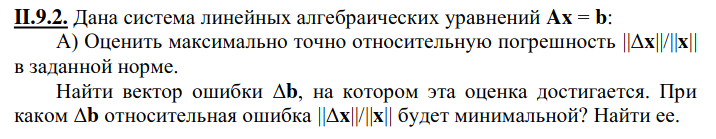
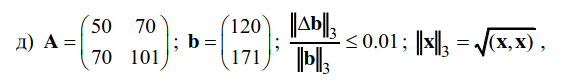


А) Запишем чему равна относительная погрешность и распишем её через абсолютную погрешность b:

$$\frac{||\Delta  x ||}{||  x ||} = \frac{|| A^{-1} \Delta\vec b ||}{|| \vec x ||} \leq \dfrac{||A||^{-1} || b|| }{||A^{-1}b||} \frac{||\Delta b|| }{||  b ||} = \nu(A,b) \cdot \dfrac{||\Delta b||}{||b||}$$

$\nu(A,b) = \dfrac{||A||^{-1} || b|| }{||A^{-1}b||} = 147.718 \Rightarrow$
$$\frac{||\Delta  x ||}{||  x ||} = 1.48$$

Если мы зафиксируем $\dfrac{||\Delta b||}{||b||} = 0.01$, то получим
$$||\Delta x|| = \dfrac{1}{150} ||\Delta b||~\text{при } \Delta b = 0.01 ||b|| (0.5735, 0.8192)^{T}$$
Максимум такой нормы достигается на собственном векторе матрицы $(A^{-1})^*A^{-1} = (A^{-1})^2$.

Собственный вектор $(A^{-1})^*A^{-1}$, на котором и достигается норма $A^{-1}$ равен:

In [8]:
Ainv = np.linalg.inv(np.array( [ [50, 70], [70, 101] ] ))
opt = np.linalg.eigh(np.matmul(Ainv, Ainv))[1][0]
n_opt = np.linalg.norm(opt)
n_b = np.sqrt(120**2 + 171**2)

print( (np.linalg.norm(np.matmul(Ainv, opt))*0.01*n_b)/n_opt/1.48 )
print(opt)

0.00941010289651551
[-0.57346234 -0.81923192]


## Задача 4(9.15\*)

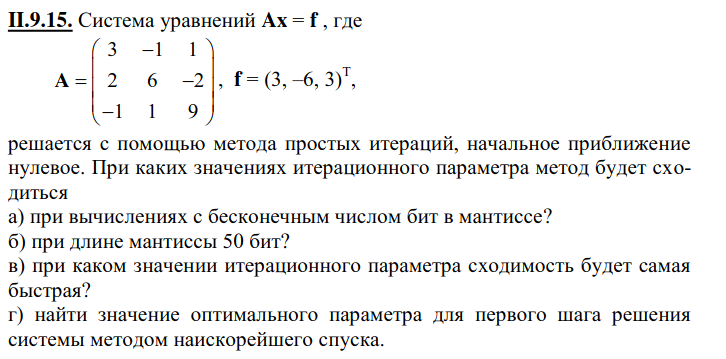

1) При бесконечном числе битов в мантиссе мы требуем просто чтобы все собственные числа матрицы $E - \tau A$ были по модулю меньше единицы:
\begin{equation*}
\left|
\begin{array}{ccc}
1-\lambda - 3\tau & \tau & -\tau \\
-2\tau & 1 - \lambda - 6\tau & 2\tau \\
\tau & -\tau & 1 - \lambda - 9\tau \\
\end{array}
\right| = / x = 1-\lambda / = (x - 3\tau)(x - 6\tau)( x - 9\tau) + 5x\tau^2 - 30\tau^3 = 0\\
x = 4\tau, 6\tau, 8\tau. При \, |1 - \lambda| < 1 \, x \in (0;2)
\end{equation*}

Соответственно, метод сходится при $\tau \in (0; 0.25)$

2) С мантиссой конечной длины нужно учитывать ошибку округления с $\varepsilon_m = 1/2^{50}$ и брать $\tau \in (\varepsilon_m; 0.25 - \varepsilon_m)$

3) Сходимость будет тем быстрее, чем меньше норма $||R|| = ||E - \tau A|| = \max\sqrt{R^*R}$

При $\tau$ =  0.12626262626262627  норма достигает минимума, равного  0.7253654850788284


4) Оптимальный параметр для первого шага может быть найден, как 
\begin{equation*}
\tau_0 = \dfrac{(Ar^0,r^0)}{(Ar^0,Ar^0) }
\end{equation*}

Вектор невязки $\vec r^0$ при начальном нулевом приближении есть не что иное, как правая часть $\vec f$

Оптимальный параметр для первого шага равен 0.2093

## Задача 5(9.23)

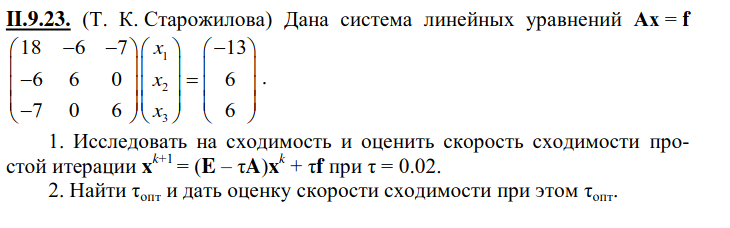
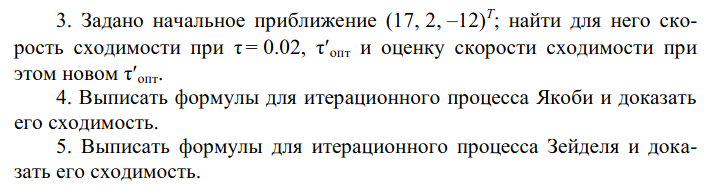

1. Найдём спектральный радиус матрицы $R=E-\tau A$

In [9]:
R = np.diag([1,1,1]) - 0.02*np.array([[18,-6,-7],[-6,6,0],[-7,0,6]])
f = [-13, 6,6]
LA.eigvals(R)

array([0.54, 0.98, 0.88])

Что меньше 1 $\Rightarrow$ метод сходится со скоростью 0.98

2. Найдём собственные числа матрицы $E - \tau A$, которые, в силу её симметричности, будут корнями из собственных корней матрицы $(E - \tau A)^2$:
\begin{equation*}
\begin{vmatrix}
y - 18\tau & 6\tau & 7\tau \\
6\tau & y - 6\tau & 0 \\
7\tau & 0 & y - 6\tau
\end{vmatrix}
= (y-18\tau)(y-6\tau^2)^2 - (y - 6\tau)49\tau^2 - (y - 6\tau)36\tau^2 = (y-6\tau)((y-18\tau)(y-6\tau) - 85\tau^2) 
\end{equation*}

Следовательно $\lambda = 1 - \tau, 1 - 6\tau, 1 - 18\tau$

При $\tau$ =  0.10437710437710436  норма достигает минимума, равного  0.8956228956228957


$\Rightarrow$ при $\tau_{opt} = 0.10437710437710436$ метод сходится со скоростью 0.8956

3) Точное решение - вектор $U = (0, 1, 1)^T$, норма $|| u^{(0)} - U ||_1 = ||17, 1, -13||_1 = 17$ (наименьшая  из $||\cdot||_1, ||\cdot||_2, ||\cdot||_3$). Следовательно, по такой норме скорость сходимости составит $||u^{(s)} - U||_1 \leqslant 17\cdot0.896^s$

4. Формулы для метода Якоби:

$$u^{(s+1)} = D^{-1}(f-(L+U)u^{(s)}) =$$
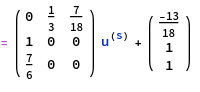

Проверим ||R||:
 $$\chi_R(\lambda) = -\lambda^3 + \lambda/3 +\dfrac{49}{96} \lambda =0$$

Отсюда видно, что $||R|| < 1$, т.е. процесс сходится.

5. Формулы для метода Зейделя:
$$u^{(s+1)} = (L+D)^{-1}(f-Uu^{(s)}) =$$
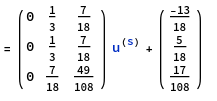

Проверим ||R||:
 $$\chi_R(\lambda) = -\lambda((\lambda -\dfrac{1}{3})(\lambda - \dfrac{49}{108}) -\dfrac{49}{324} =0$$
Отсюда видно, что $||R|| < 1$, т.е. процесс сходится.

## Задача 6(\*\*)

## Задача 7(10.6р)

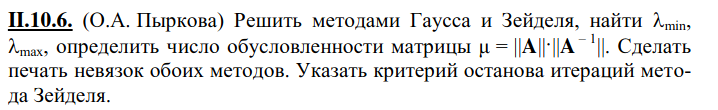
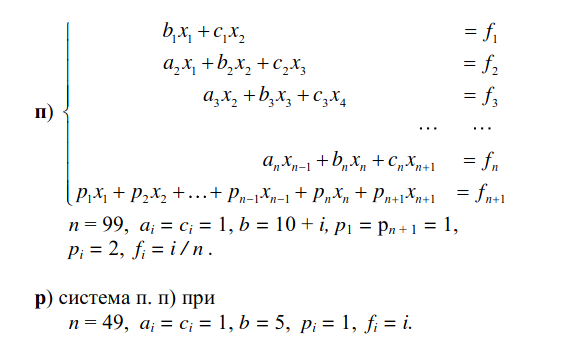

In [2]:
f = np.array(range(1,51))

A = np.diag([1]*49,1) + np.diag([1]*49,-1) + np.diag([5]*50,0)
A[49] = np.array([1]*50)

A

array([[5, 1, 0, ..., 0, 0, 0],
       [1, 5, 1, ..., 0, 0, 0],
       [0, 1, 5, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 1, 0],
       [0, 0, 0, ..., 1, 5, 1],
       [1, 1, 1, ..., 1, 1, 1]])

Решение методом Гаусса

In [4]:
x_sol = np.dot(np.linalg.inv(A), f)

err_gauss = f-np.dot(A, x_sol)
print("Невязка метода Гаусса: \n" + str((err_gauss).reshape(-1,1)))

Невязка метода Гаусса: 
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.88178420e-16]
 [ 1.77635684e-15]
 [-1.77635684e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.55271368e-15]
 [-3.55271368e-15]
 [-1.77635684e-15]
 [-1.77635684e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-3.55271368e-15]
 [-7.10542736e-15]
 [ 0.00000000e+00]
 [-1.06581410e-14]
 [-7.10542736e-15]
 [ 7.10542736e-15]
 [ 0.00000000e+00]
 [ 7.10542736e-15]
 [-3.55271368e-15]
 [ 3.55271368e-15]
 [ 7.10542736e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.10542736e-15]
 [ 0.00000000e+00]
 [ 7.10542736e-15]
 [ 1.42108547e-14]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-7.10542736e-15]
 [-1.42108547e-14]
 [-7.10542736e-15]
 [ 7.10542736e-15]
 [-7.10542736e-15]
 [ 0.00000000e+00]
 [ 7.10542736e-15]
 [-2.84217094e-14]]


Решение методом Зейделя

In [5]:
def seidel(A, b, eps):
    n = len(A)
    x = np.zeros(n) # начальный вектор
    
    conv = False
    while not conv:
        x_new = np.copy(x)
        for i in range(n):
            s1=0
            for j in range(i):
                s1 += A[i][j] * x_new[j]
            
            s2=0
            for j in range(i+1,n):
                s2 += A[i][j] * x[j]
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        conv = np.sqrt(sum((x_new[i] - x[i])**2 for i in range(n))) <= eps
        x = x_new

    return x

In [6]:
x_sol_seidel = seidel(A, f, 10**(-10))
err = [0]*50
for i in range(50):
    err[i] = sum((A[i][j]* x_sol_seidel[j]) for j in range(50)) - f[i]
    
print("Невязка метода Зейделя: \n" + str(np.array(err).reshape(-1,1)))

Невязка метода Зейделя: 
[[ 1.11022302e-15]
 [ 8.88178420e-16]
 [ 1.33226763e-15]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 8.88178420e-16]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 0.00000000e+00]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 1.77635684e-15]
 [ 0.00000000e+00]
 [ 1.77635684e-15]
 [ 0.00000000e+00]
 [ 3.55271368e-15]
 [ 0.00000000e+00]
 [ 3.55271368e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 3.55271368e-15]
 [ 3.55271368e-15]
 [ 3.55271368e-15]
 [ 3.55271368e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.71596071e-12]
 [ 6.29896135e-12]
 [-1.22284405e-11]
 [ 1.66693326e-11]
 [-1.78630444e-11]
 [ 1.60156333e-11]
 [-1.24629196e-11]
 [ 8.64019967e-12]
 [-5.43565193e-12]
 [ 3.14059889e-12]
 [-1.67688086e-12]
 [ 8.38440428e-13]
 [-3.90798505e-13]
 [ 1.77635684e-13]
 [-7.10542736e-14]
 [ 2.84217094e-14]
 [-7.10542736e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.84217094e-14]
 [ 0.00000000e+00]]


In [7]:
print("Норма невязки метода Зейделя: \n" + str(np.sqrt(sum(err[i]**2 for i in range(50)))))

print("Норма невязки метода Гаусса: \n" + str(np.sqrt(sum(err_gauss[i]**2 for i in range(50)))))


print("\n\nОтличие по норме двух методов решения: " + str(np.sqrt(sum((err[i]-err_gauss[i])**2 for i in range(50)))))

Норма невязки метода Зейделя: 
3.6313975342583373e-11
Норма невязки метода Гаусса: 
4.4877186754845086e-14


Отличие по норме двух методов решения: 3.6308502831245523e-11


Нахождение максимального и минимального собственных значений матрицы(по модулю)

$\lambda_{макс}$

In [8]:
u_k_1 = np.array([1]*50)
u_k_1 = u_k_1/np.dot(u_k_1,u_k_1)
u_k = np.array([0]*50)

lambda_max = 0


for i in range(10000):
    u_k = np.dot(A,u_k_1)
    lambda_max = np.dot(u_k, u_k_1)/np.dot(u_k_1, u_k_1)
    u_k_1 = np.copy(u_k/np.dot(u_k,u_k))
    
print("Максимальное собственное значение матрицы A: " + str(lambda_max))

Максимальное собственное значение матрицы A: 7.023592375788805


Точное значение посчитанное с помощью numpy:

In [22]:
LA.eig(A)[0].max()

7.0235923757888274

Как видим, отличие в 14-ом порядке

$\lambda_{мин}$

Для нахождения минимального собственного знчения матрицы, будем использовать тот же алгоритм, но для матрицы $A^{-1}$

In [9]:
def eliminate(r1, r2, col, target=0):
    fac = (r2[col]-target) / r1[col]
    for i in range(len(r2)):
        r2[i] -= fac * r1[i]

def gauss(a):
    for i in range(len(a)):
        if a[i][i] == 0:
            for j in range(i+1, len(a)):
                if a[i][j] != 0:
                    a[i], a[j] = a[j], a[i]
                    break
            else:
                raise ValueError("Matrix is not invertible")
        for j in range(i+1, len(a)):
            eliminate(a[i], a[j], i)
    for i in range(len(a)-1, -1, -1):
        for j in range(i-1, -1, -1):
            eliminate(a[i], a[j], i)
    for i in range(len(a)):
        eliminate(a[i], a[i], i, target=1)
    return a

def inverse(a):
    tmp = [[] for _ in a]
    for i,row in enumerate(a):
        assert len(row) == len(a)
        tmp[i].extend(row + [0]*i + [1] + [0]*(len(a)-i-1))
    gauss(tmp)
    ret = []
    for i in range(len(tmp)):
        ret.append(tmp[i][len(tmp[i])//2:])
    return ret

In [10]:
%%time

A_inv = np.array(inverse(A.tolist()))

CPU times: user 21.2 ms, sys: 765 µs, total: 22 ms
Wall time: 21.2 ms


In [23]:
u_k_1 = np.array([1]*50)
u_k_1 = u_k_1/np.dot(u_k_1,u_k_1)
u_k = np.array([0]*50)

lambda_min = 0


for i in range(10000):
    u_k = np.dot(A_inv,u_k_1)
    lambda_min = np.dot(u_k, u_k_1)/np.dot(u_k_1, u_k_1)
    u_k_1 = np.copy(u_k/np.dot(u_k,u_k))
    
lambda_min = 1/lambda_min
print("Минимальное собственное значение матрицы A: " + str(lambda_min))

Минимальное собственное значение матрицы A: 0.7979319694208458


Точное значение посчитанное с помощью numpy:

In [31]:
LA.eig(A)[0].min()

0.7979319694208475

Как видно отличие также в 15-ом порядке.

Число обусловленности матрицы в l2 норме: $\sqrt{\lambda(A A^T) \lambda(A^{-1} (A^{-1})^T)}$

In [52]:
u_k_1 = np.array([1]*50)
u_k_1 = u_k_1/np.dot(u_k_1,u_k_1)
u_k = np.array([0]*50)

lambda_max = 0

AAt = np.dot(A, A.T)

for i in range(10000):
    u_k = np.dot(AAt,u_k_1)
    norm_A = np.dot(u_k, u_k_1)/np.dot(u_k_1, u_k_1)
    u_k_1 = np.copy(u_k/np.dot(u_k,u_k))
    
norm_A = np.sqrt(norm_A)
print("Норма матрицы A: " + str(norm_A))

Норма матрицы A: 9.90836581782762


In [54]:
u_k_1 = np.array([1]*50)
u_k_1 = u_k_1/np.dot(u_k_1,u_k_1)
u_k = np.array([0]*50)

lambda_max = 0

AAt_inv = np.dot(A_inv, A_inv.T)

for i in range(10000):
    u_k = np.dot(AAt_inv,u_k_1)
    norm_A_inv = np.dot(u_k, u_k_1)/np.dot(u_k_1, u_k_1)
    u_k_1 = np.copy(u_k/np.dot(u_k,u_k))
    
norm_A_inv = np.sqrt(norm_A_inv)
print("Норма матрицы A^-1: " + str(norm_A_inv))

Норма матрицы A^-1: 1.7626465023921405


In [55]:
print('Число обусловленности матрицы в l2 норме: ' + str(norm_A_inv * norm_A))

Число обусловленности матрицы в l2 норме: 17.464946353215698


Реализация в numpy:

In [56]:
LA.cond(A, p=2)

17.46494635321569